In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
df_cleaned = pd.read_csv('/content/drive/MyDrive/Projects/IPL auction/Ipl2022Cleaned.csv')

In [ ]:
df_cleaned.head()

,Unnamed: 0,Player,Role,BasePrice,Salaries (lakh),Mat,Inns,NO,Runs,HS,...,Inns.1,Balls,Runs.1,Wkts,Ave.1,Econ,SR.1,4w,5w,10w
0,0,Aaron Finch,Batter,150.0,0.0,382.0,376.0,39.0,11392.0,172.0,...,28.0,239.0,369.0,7.0,52.71,9.26,34.1,0.0,0.0,0.0
1,1,Abdul Samad,Batter,0.0,400.0,53.0,45.0,13.0,920.0,76.0,...,14.0,126.0,213.0,4.0,53.25,10.14,31.5,0.0,0.0,0.0
2,2,Abhijeet Tomar,Batter,20.0,40.0,8.0,8.0,1.0,153.0,84.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
3,3,Abhinav Manohar,Allrounder,20.0,260.0,20.0,16.0,5.0,402.0,70.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
4,4,Abhishek Sharma,Allrounder,20.0,650.0,67.0,65.0,12.0,1476.0,107.0,...,35.0,480.0,511.0,26.0,19.65,6.38,18.4,0.0,0.0,0.0


In [ ]:
df_cleaned = df_cleaned.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df_cleaned.describe()

,BasePrice,Salaries (lakh),Mat,Inns,NO,Runs,HS,Ave,BF,SR,...,Inns.1,Balls,Runs.1,Wkts,Ave.1,Econ,SR.1,4w,5w,10w
count,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,...,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.0
mean,60.573529,257.647059,116.267647,83.232353,19.223529,1692.479412,58.161765,18.584294,1266.873529,111.615824,...,65.129412,1281.458824,1631.235294,67.314706,20.104588,6.379088,15.616176,1.229412,0.297059,0.0
std,64.593422,392.378413,110.283419,98.636615,21.800991,2538.532125,41.836037,11.719176,1850.411520,37.609850,...,87.005752,1797.155147,2249.502669,96.461210,15.498449,3.387785,11.511487,2.075355,0.746668,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,20.000000,0.000000,32.000000,16.000000,4.000000,80.500000,21.750000,8.587500,88.000000,99.592500,...,2.000000,16.750000,23.250000,0.000000,0.000000,6.367500,0.000000,0.000000,0.000000,0.0
50%,20.000000,50.000000,80.000000,42.500000,13.000000,534.500000,55.000000,18.075000,412.000000,123.835000,...,30.500000,531.500000,690.500000,25.000000,22.630000,7.455000,17.950000,0.000000,0.000000,0.0
75%,100.000000,400.000000,166.750000,112.000000,28.000000,2008.750000,92.000000,27.860000,1586.500000,134.290000,...,94.500000,1906.250000,2398.000000,98.500000,27.505000,8.175000,21.225000,2.000000,0.000000,0.0
max,200.000000,1700.000000,624.000000,554.000000,166.000000,12156.000000,172.000000,72.600000,8515.000000,190.000000,...,528.000000,10838.000000,14876.000000,615.000000,87.000000,18.000000,71.000000,12.000000,6.000000,0.0


#Categorical data prep

Convert the Salary column into 7 categories.

In [ ]:
df_cat = df_cleaned.drop(['Player'], axis = 1)
df_cat = df_cat[df_cat['Role'] != 'Unknown']
df_cat = pd.get_dummies(df_cat, columns = ['Role', 'BasePrice'], drop_first = True)

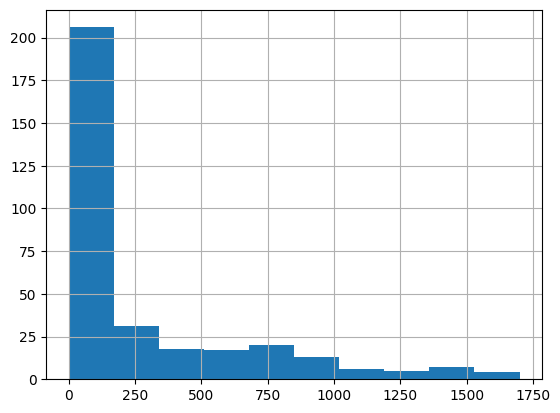

In [ ]:
df_cat['Salaries (lakh)'].hist()
plt.show()

In [ ]:
bins  = list(df_cat[df_cat['Salaries (lakh)'] > 20]['Salaries (lakh)'].quantile(np.linspace(0,1,6)))

In [ ]:
bins[0] = 20.0
#pd.cut does not consider the first element, or using right = False, it will not consider the last element

In [ ]:
bins

[20.0, 75.0, 200.0, 448.0000000000004, 825.0, 1700.0]

In [ ]:
df_cat['Salary_Cat'] = ''

In [ ]:
categories = np.array(
     ['Unsold','One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven'])

df_cat['Salary_Cat'] = pd.Categorical(
   df_cat['Salary_Cat'], categories=categories, ordered = True)

In [ ]:
df_cat = df_cat.assign(Salary_Cat =pd.cut(df_cat[df_cat['Salaries (lakh)'] > 20]['Salaries (lakh)'], 
                               bins=bins, 
                               labels=['Three', 'Four', 'Five', 'Six', 'Seven']))

In [ ]:
df_cat['Salary_Cat'] = np.where(df_cat['Salaries (lakh)'] == 0, 'Unsold', df_cat['Salary_Cat'])

In [ ]:
df_cat['Salary_Cat'] = np.where(df_cat['Salaries (lakh)'] == 20, 'One', df_cat['Salary_Cat'])

In [ ]:
df_cat['Salary_Cat'].unique()

array(['Unsold', 'Five', 'Three', 'Six', 'Four', 'One', 'Seven'],
      dtype=object)

In [ ]:
df_cat['Salary_Cat'].value_counts()

Unsold    90
One       52
Three     41
Four      41
Six       39
Seven     35
Five      29
Name: Salary_Cat, dtype: int64

<Axes: >

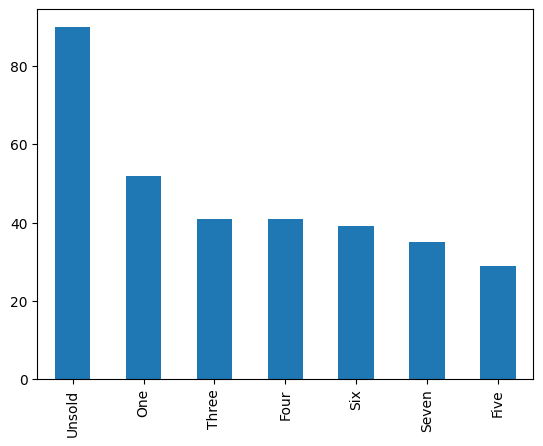

In [ ]:
df_cat['Salary_Cat'].value_counts().plot(kind='bar')

## Modelling the data

In [ ]:
X = df_cat.drop(['Salaries (lakh)', 'Salary_Cat'], axis = 1)
y = df_cat['Salary_Cat']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=24)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import metrics

In [ ]:
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LogisticRegression())]))))
pipelines.append(('scaledDT' , (Pipeline([('scaled' , StandardScaler()),('DT' ,DecisionTreeClassifier())]))))
pipelines.append(('scaledRF' , (Pipeline([('scaled' , StandardScaler()),('RF' ,RandomForestClassifier())]))))
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , StandardScaler()),('KNN' ,KNeighborsClassifier())]))))
pipelines.append(('scaledSVC' , (Pipeline([('scaled' , StandardScaler()),('SVC' ,SVC(probability= True))]))))
pipelines.append(('scaledLDA' , (Pipeline([('scaled' , StandardScaler()),('LDA' ,LDA())]))))

In [ ]:
model_name = []
results = []
for pipe ,model in pipelines:
    model.fit(X_train,y_train)
    model_name.append(pipe)
    accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    y_pred_proba = model.predict_proba(X_test)
    auc = metrics.roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    msg = "%s: (accuracy) %f (auc) %g " % (pipe,accuracy,auc)
    print(msg)

scaledLR: (accuracy) 0.323232 (auc) 0.720425 
scaledDT: (accuracy) 0.212121 (auc) 0.540494 
scaledRF: (accuracy) 0.232323 (auc) 0.654253 
scaledKNN: (accuracy) 0.282828 (auc) 0.667608 
scaledSVC: (accuracy) 0.262626 (auc) 0.702072 
scaledLDA: (accuracy) 0.282828 (auc) 0.685081 


##Feature selection

### PCA

In [ ]:
df_pca = X.copy()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(df_pca)
Scaled_data=scaling.transform(df_pca)
 
# Set the n_components=3
principal=PCA(n_components=10)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(327, 10)


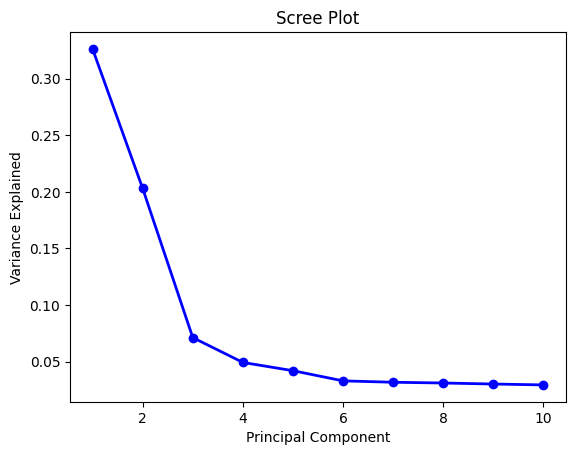

In [ ]:
PC_values = np.arange(principal.n_components_) + 1
plt.plot(PC_values, principal.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
print(principal.explained_variance_ratio_)

[0.32632268 0.20304494 0.07124396 0.0492901  0.0419912  0.03299436
 0.03177976 0.0311111  0.03021016 0.02942125]


In [ ]:
# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
 
# Check the dimensions of data after PCA
print(x.shape)

(327, 3)


In [ ]:
X_pca = pd.DataFrame(x)

In [ ]:
X_pca

,0,1,2
0,10.630049,-3.076143,4.335732
1,-0.673258,-1.190010,3.004476
2,-2.321932,-2.895280,-1.642231
3,-1.824253,-2.672141,-1.699312
4,-0.559405,-1.644903,0.514443
...,...,...,...
322,-2.238483,-1.123610,0.371333
323,-3.464332,-0.101958,0.536078
324,-1.289547,-3.714710,-1.383543
325,-1.054108,-2.021309,0.216643


In [ ]:
#Train test train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca , y, test_size=0.30, random_state=24)

In [ ]:
results = []
for pipe ,model in pipelines:
    model.fit(X_train_pca,y_train_pca)
    accuracy = metrics.accuracy_score(y_test_pca, model.predict(X_test_pca))
    y_pred_proba = model.predict_proba(X_test_pca)
    auc = metrics.roc_auc_score(y_test_pca, y_pred_proba, multi_class='ovr')
    msg = "%s_pca: (accuracy) %f (auc) %g " % (pipe,accuracy,auc)
    print(msg)

scaledLR_pca: (accuracy) 0.272727 (auc) 0.658799 
scaledDT_pca: (accuracy) 0.282828 (auc) 0.562566 
scaledRF_pca: (accuracy) 0.303030 (auc) 0.687984 
scaledKNN_pca: (accuracy) 0.262626 (auc) 0.61615 
scaledSVC_pca: (accuracy) 0.262626 (auc) 0.667278 
scaledLDA_pca: (accuracy) 0.282828 (auc) 0.654588 


###Lasso

In [ ]:
df_lasso = df_cat.copy()

In [ ]:
df_lasso['Salary_Cat'].replace(['Unsold','One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven'], [0,1,2,3,4,5,6,7], inplace = True)

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
X_lasso = df_lasso.drop(['Salaries (lakh)', 'Salary_Cat'], axis = 1)
y_lasso = df_lasso['Salary_Cat']

In [ ]:
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y_lasso, test_size=0.33, random_state=24)

In [ ]:
features = X_train_lasso.columns.values.tolist() 

In [ ]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [ ]:
# optimize the α hyperparameter of Lasso regression
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
)

In [ ]:
from sklearn import linear_model
regressor = linear_model.Lasso(alpha=5000,
                               positive=True,
                               fit_intercept=False, 
                               max_iter=1000,
                               tol=0.0001)
regressor.fit(X_train_lasso, y_train_lasso)

Lasso(alpha=5000, fit_intercept=False, positive=True)

In [ ]:
search.fit(X_train_lasso,y_train_lasso)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END .................model__alpha=0.1;, score=-5.085 total time=   0.0s
[CV 2/5] END .................model__alpha=0.1;, score=-5.845 total time=   0.0s
[CV 3/5] END .................model__alpha=0.1;, score=-3.503 total time=   0.0s
[CV 4/5] END .................model__alpha=0.1;, score=-4.269 total time=   0.0s
[CV 5/5] END .................model__alpha=0.1;, score=-4.240 total time=   0.0s
[CV 1/5] END .................model__alpha=0.2;, score=-5.072 total time=   0.0s
[CV 2/5] END .................model__alpha=0.2;, score=-5.787 total time=   0.0s
[CV 3/5] END .................model__alpha=0.2;, score=-3.990 total time=   0.0s
[CV 4/5] END .................model__alpha=0.2;, score=-4.224 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-4.534 total time=   0.0s
[CV 1/5] END .model__alpha=0.30000000000000004;, score=-4.838 total time=   0.0s
[CV 2/5] END .model__alpha=0.30000000000000004;

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
#The best value for α is:
search.best_params_

{'model__alpha': 0.1}

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [ ]:
importance = np.abs(coefficients)
importance

array([0.        , 0.        , 0.        , 0.        , 0.21815457,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.13521756, 0.        , 0.07516396, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.10780918,
       0.00666175, 0.        , 0.        , 0.09187274, 0.        ,
       0.21222078, 0.        , 0.        , 1.22333001, 0.09552748,
       0.07511987, 0.61285903, 0.17834658, 0.        , 0.        ,
       0.        ])

We can discard the features with importance zero.

In [ ]:
features_lasso = np.array(features)[importance > 0]

In [ ]:
features_lasso

array(['HS', '6s', 'St', 'Ave.1', 'Econ', '5w', 'Role_Batter',
       'BasePrice_20.0', 'BasePrice_30.0', 'BasePrice_40.0',
       'BasePrice_50.0', 'BasePrice_75.0'], dtype='<U24')

In [ ]:
discarded = np.array(features)[importance == 0]
discarded

array(['Mat', 'Inns', 'NO', 'Runs', 'Ave', 'BF', 'SR', '100s', '50s',
       '4s', 'Ct', 'Mat.1', 'Inns.1', 'Balls', 'Runs.1', 'Wkts', 'SR.1',
       '4w', '10w', 'Role_Bowler', 'Role_Wicketkeeper Batter',
       'BasePrice_100.0', 'BasePrice_150.0', 'BasePrice_200.0'],
      dtype='<U24')

In [ ]:
df_l = df_lasso.loc[:, list(features_lasso)]

In [ ]:
df_l.head()

,HS,6s,St,Ave.1,Econ,5w,Role_Batter,BasePrice_20.0,BasePrice_30.0,BasePrice_40.0,BasePrice_50.0,BasePrice_75.0
0,172.0,452.0,0.0,52.71,9.26,0.0,1,0,0,0,0,0
1,76.0,57.0,0.0,53.25,10.14,0.0,1,0,0,0,0,0
2,84.0,5.0,0.0,0.00,0.00,0.0,1,1,0,0,0,0
3,70.0,23.0,0.0,0.00,0.00,0.0,0,1,0,0,0,0
4,107.0,61.0,0.0,19.65,6.38,0.0,0,1,0,0,0,0


In [ ]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(df_l, y_lasso, test_size=0.33, random_state=24)

In [ ]:
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LogisticRegression())]))))
pipelines.append(('scaledDT' , (Pipeline([('scaled' , StandardScaler()),('DT' ,DecisionTreeClassifier())]))))
pipelines.append(('scaledRF' , (Pipeline([('scaled' , StandardScaler()),('RF' ,RandomForestClassifier())]))))
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , StandardScaler()),('KNN' ,KNeighborsClassifier())]))))
pipelines.append(('scaledSVC' , (Pipeline([('scaled' , StandardScaler()),('SVC' ,SVC(probability=True))]))))
pipelines.append(('scaledLDA' , (Pipeline([('scaled' , StandardScaler()),('LDA' ,LDA())]))))

In [ ]:
model_name = []
results = []
for pipe ,model in pipelines:
    model.fit(X_train_l,y_train_l)
    model_name.append(pipe)
    accuracy = metrics.accuracy_score(y_test_l, model.predict(X_test_l))
    y_pred_proba = model.predict_proba(X_test_l)
    auc = metrics.roc_auc_score(y_test_l, y_pred_proba, multi_class='ovr')
    msg = "%s_lasso: (accuracy) %f (auc) %g " % (pipe,accuracy,auc)
    print(msg)

scaledLR_lasso: (accuracy) 0.240741 (auc) 0.720905 
scaledDT_lasso: (accuracy) 0.212963 (auc) 0.544399 
scaledRF_lasso: (accuracy) 0.250000 (auc) 0.664439 
scaledKNN_lasso: (accuracy) 0.305556 (auc) 0.66479 
scaledSVC_lasso: (accuracy) 0.277778 (auc) 0.695508 
scaledLDA_lasso: (accuracy) 0.222222 (auc) 0.717025 
